 ## HW2 - Satellite image classification 

Johnathan Clementi    
MUSA - 650 Remote Sensing    
3/16/2022   


Include your code in the relevant cells below. Subparts labeled as questions (Q1.1, Q1.2, etc.) should have their answers filled in place or plots placed prominently, as appropriate.

Please make sure to remove irrelevant code or outputs, and to include descriptive comments with all of your code.

In [1]:
!pip install tifffile

In [46]:
# import json
import os
import pandas as pd
import numpy as np
from math import *
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

from sklearn.linear_model import LinearRegression

#### Import data
This dataset comes from https://www.kaggle.com/rhammell/planesnet

In [3]:
# If using Google Colab, run this code
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
directory = '/content/drive/MyDrive/Grad School/Penn_MUSA/Spring2022/650_RemoteSensing/Homework/HW2'
data_directory = '{}/Data'.format(directory)

In [5]:
print(os.listdir(data_directory))

['planesnet.json', 'planesnet']


In [6]:
df = pd.read_json('{}/planesnet.json'.format(data_directory))

random_state = 222

In [7]:
#############################################################
#### Remove this code when running for final submission #####
#### down sample so models run quickly ######################
# df = df.groupby('labels').sample(frac = 0.3, random_state = random_state)

In [8]:
# If running code locally, run this code
#path = os.getcwd()
# print(os.listdir("{}/data".format(path)))
#df = pd.read_json('{}/data/planesnet.json'.format(path))

### S1:

- Load the Planes in Satellite Imagery dataset: https://www.kaggle.com/rhammell/planesnet.


Q1.1: Visualize a few of the images for different labels.

Q1.2: What is the total number of images in this dataset:   32,000

Q1.3: What is the number of labels in this dataset:

<table>
  <tr><th>Label<th>Count
  <tr><td> 0 <td> 24000
  <tr><td> 1 <td> 8000
</table>

Q1.4: What is the dimensionality of each image in this dataset:   
Each image is 20 x 20 x 3

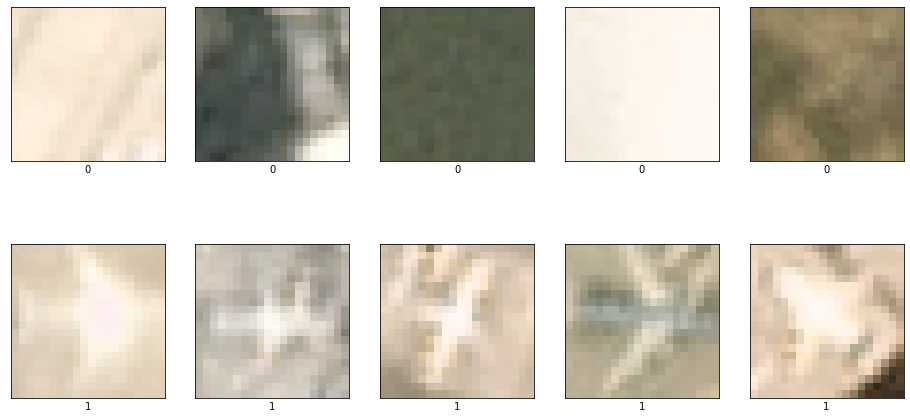

In [9]:
# Q 1.1: Visualize a few images for different labels

viz = df.groupby('labels').sample(n = 5, random_state = random_state)

plt.figure(figsize=(16,8))

for i in range(10):
  # Choose random img and its label
  # randIdx = random.randrange(0, len(df['data']))
  img = np.array(viz['data'].iloc[i]) / 255
  img = img.reshape((3, 400)).T.reshape(20,20,3) # T is for transpose
  label = viz['labels'].iloc[i]

  # Display img
  plt.subplot(2,5,i+1)
  plt.xticks([]) # Remove tick marks on x axis
  plt.yticks([]) # Remove tick marks on y axis
  plt.imshow(img)
  plt.xlabel(label)

plt.show()

In [42]:
# Q1.2
count = df['labels'].value_counts()
print(count)

0    24000
1     8000
Name: labels, dtype: int64


33.940618514147936

In [52]:
# Q1.4
img = mpimg.imread('{}/planesnet/'.format(data_directory) + os.listdir('{}/planesnet'.format(data_directory))[0])
img.shape

(20, 20, 3)

### S2:

- Create data matrices X and y as follows:
  - Extract the color channels from each image and flatten them to a feature matrix X (*Hint: use the included JSON file to do this easily*).
  - Create the labels y (with binary labels 0 and 1) for each image.
- Using X and y, create a split dataset with 70% training and 30% testing data with similar distributions for the two classes.

Q2.1: What is the size of X (before splitting):   32,000 rows x 1200 columns

Q2.2: What is the size of y (before splitting):   32,000 rows x 1 column

In [11]:
X = np.vstack(df.iloc[:,0].values)
y = np.ravel(df.iloc[:,1].values)

In [12]:
print(X)
print(y)

[[206 195 187 ... 224 194 164]
 [215 209 200 ... 205 207 210]
 [204 214 220 ... 167 163 157]
 ...
 [121 121 119 ... 175 178 156]
 [172 190 202 ... 210 203 192]
 [161 172 189 ... 137 123 140]]
[1 1 1 ... 0 0 0]


In [13]:
print(X.shape)
print(y.shape)

(32000, 1200)
(32000,)


In [14]:
# Scale the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = random_state, stratify = y)

In [16]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(22400, 1200)
(9600, 1200)
(22400,)
(9600,)


### S3:

- Train a SVM classifier using the Sigmoid kernel (with default values for other parameters) on the training data and use it to predict labels of the testing data.

Q3.1: What is the training accuracy: 68.56%

Q3.2: What is the testing accuracy: 68.97%

Q3.3: Show the confusion matrix for the classification of testing samples.

Q3.4: What is the AUC (area under the curve) for the classification of testing samples : .696


In [17]:
from sklearn.svm import SVC

svc_sigmoid = SVC(kernel='sigmoid', random_state = random_state)

print('Train size: ' + str(y_train.shape[0]))

### Training the model
print('Training the model ...')
svc_sigmoid.fit(X_train, y_train)

print('Applying the model ...')
y_train_pred = svc_sigmoid.predict(X_train)
yPred = svc_sigmoid.predict(X_test)

print('Training Accuracy: ' + str(100 * np.sum(y_train_pred==y_train) / y_train.shape[0]))
print('Testing Accuracy: ' + str(100 * np.sum(yPred==y_test) / y_test.shape[0]))

Train size: 22400
Training the model ...
Applying the model ...
Training Accuracy: 68.55803571428571
Testing Accuracy: 68.96875


In [18]:
from sklearn import metrics

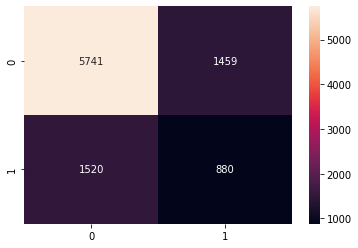

In [19]:
sns.heatmap(metrics.confusion_matrix(y_test, yPred), annot=True, fmt = 'g')
plt.show()

Sigmoid SVM AUC: 0.6964140914351852


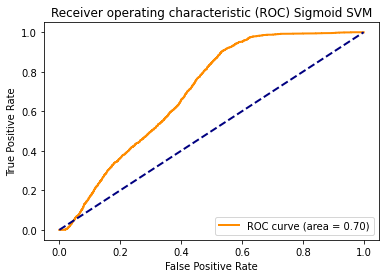

In [20]:
yPred_Sigmoid = svc_sigmoid.decision_function(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, yPred_Sigmoid)
auc_sigmoid = metrics.auc(fpr, tpr)
print('Sigmoid SVM AUC: ' + str(auc_sigmoid))

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw,
         label='ROC curve (area = %0.2f)' % auc_sigmoid)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Sigmoid SVM')
plt.legend(loc="lower right")
plt.show()

### S4:
- Train a new SVM classifier using the RBF kernel (leaving other parameters as their default values), and use it to predict labels of the testing data.

Q4.1: What is the training accuracy: 96.57%

Q4.2: What is the testing accuracy: 96.02%

Q3.3: Show the confusion matrix: See below

Q3.4: What is the AUC (area under the curve) for the classification: .988 

Q4.5: Using the metrics of accuracy and AUC, which of your models is better? Is there anything else to consider?

Q4.5A:   
When comparing the metrics of model accuracy and area under the curve (AUC) for the SVC models using Sigmoid and RBF kernels, it is clear that there are pro's and con's to each kernel method. It is first useful to compare model accuracy when applied to the testing data. With the accuracy of 96.02%, the RBF SVC certainly is better at predicting plane/no plane in the test set, compared to the accuracy of 68.97% for the Sigmoid SVC. 
The AUC values for both, .988 for RBF and .696 are definitely better than a 50/50 coin toss, which indicates that both models are useful in their own right. However, when plotted, the steep initial slope of the ROC curve for the RBF SVC indicates that that model may not generalize well to unseen data and may be overfit. 
Conversely, the ROC curve for the Sigmoid SVC indicates that while still better than a coin toss, there is still much room for improvement on that model.

In [21]:
svc_rbf = SVC(kernel='rbf')

print('Train size: ' + str(y_train.shape[0]))

### Training the model
print('Training the model ...')
svc_rbf.fit(X_train, y_train)

print('Applying the model ...')
y_train_pred = svc_rbf.predict(X_train)
yPred = svc_rbf.predict(X_test)

print('Training Accuracy: ' + str(100 * np.sum(y_train_pred==y_train) / y_train.shape[0]))
print('Testing Accuracy: ' + str(100 * np.sum(yPred==y_test) / y_test.shape[0]))

Train size: 22400
Training the model ...
Applying the model ...
Training Accuracy: 96.57142857142857
Testing Accuracy: 96.02083333333333


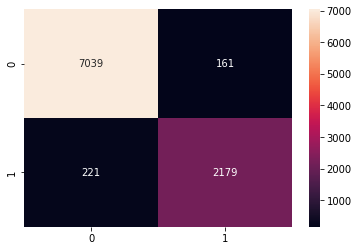

In [22]:
sns.heatmap(metrics.confusion_matrix(y_test, yPred), annot=True, fmt = 'g')
plt.show()

RBF SVM AUC: 0.9879960937500001


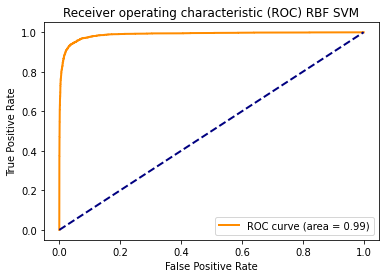

In [23]:
yPred_rbf = svc_rbf.decision_function(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, yPred_rbf)
auc_rbf = metrics.auc(fpr, tpr)
print('RBF SVM AUC: ' + str(auc_rbf))

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw,
         label='ROC curve (area = %0.2f)' % auc_rbf)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) RBF SVM')
plt.legend(loc="lower right")
plt.show()

### S5:
- You will now try to find the best value for the regularization parameter $C$ from among the values [0.1, 1, 10].
- Train a SVM classifier with Sigmoid kernel with different values for $C$ using leave-10%-out cross-validation within your training data.
- Train a SVM classifier with RBF kernel with different values for $C$ using leave-10%-out cross-validation within your training data.
- Select the best model parameters (from the 6 models: 2 SVM kernels x 3 parameters) based on highest cross-validated accuracy. Train the selected model on the complete training set and apply on the testing set.

Q5.1: What is the best choice of $C$ for the linear kernel: 0.1

Q5.2: What is the best choice of $C$ for the RBF kernel: 10

Q5.3: What is the accuracy of best model on testing data: 97.39% (RBF with $C$ = 10)


In [24]:
# Reduce the dataset size again to run L10OCV
df10 = df.groupby('labels').sample(frac = 0.1, random_state = random_state)
X10 = np.vstack(df10.iloc[:,0].values)
y10 = np.ravel(df10.iloc[:,1].values)

# Scale the data
scaler = StandardScaler().fit(X10)
X10 = scaler.transform(X10)

# Split into train/test sets 
X10_train, X10_test, y10_train, y10_test = train_test_split(X10, y10, test_size=0.1, random_state = random_state, stratify = y10)

print(X10_train.shape)
print(X10_test.shape)
print(y10_train.shape)
print(y10_test.shape)

(2880, 1200)
(320, 1200)
(2880,)
(320,)


In [25]:
# Define parameters to test:
param_grid = {'C': [0.1, 1, 10],  
              # 'kernel': ['linear', 'rbf']
            }


Grid Search CV for SVC with Sigmoid kernel hyperparameter tuning

In [26]:
from sklearn.model_selection import GridSearchCV

grid_sigmoid = GridSearchCV(svc_sigmoid, param_grid, cv=10, refit = True, verbose = 3,n_jobs=-1)
# n_jobs indicates number of cores will be used to run processes in parallel, -1 means use all cores
   
# fitting the model for grid search 
grid_sigmoid.fit(X10_train, y10_train) 
 
# print best parameter after tuning 
print(grid_sigmoid.best_params_) 
grid_sigmoid_predictions = grid_sigmoid.predict(X10_test) 
   
# print classification report 
print(metrics.classification_report(y10_test, grid_sigmoid_predictions)) 

Fitting 10 folds for each of 3 candidates, totalling 30 fits
{'C': 0.1}
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       240
           1       0.65      0.55      0.59        80

    accuracy                           0.81       320
   macro avg       0.75      0.73      0.74       320
weighted avg       0.80      0.81      0.81       320



In [27]:
grid_rbf = GridSearchCV(svc_rbf, param_grid, cv=10, refit = True, verbose = 3,n_jobs=-1)
# n_jobs indicates number of cores will be used to run processes in parallel, -1 means use all cores
   
# fitting the model for grid search 
grid_rbf.fit(X10_train, y10_train) 
 
# print best parameter after tuning 
print(grid_rbf.best_params_) 
grid_rbf_predictions = grid_rbf.predict(X10_test) 
   
# print classification report 
print(metrics.classification_report(y10_test, grid_rbf_predictions)) 

Fitting 10 folds for each of 3 candidates, totalling 30 fits
{'C': 10}
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       240
           1       0.90      0.88      0.89        80

    accuracy                           0.94       320
   macro avg       0.93      0.92      0.92       320
weighted avg       0.94      0.94      0.94       320



In [28]:
# Train model based on hyperparameters from GridSearchCV
tuned_model = SVC(kernel='rbf', C=10)
tuned_model.fit(X_train, y_train)

# Print predictions for tuned model
yPred = tuned_model.predict(X_test)
print('RBF & C=10 Testing Accuracy: ' + str(100 * np.sum(yPred==y_test) / y_test.shape[0]))

RBF & C=10 Testing Accuracy: 97.39583333333333


### S6:

Unsupervised learning: Clustering

- Apply k-Means clustering with k=2 on the complete set using vectorized imaging features

Q6.1: What is the distribution of plane vs non-plane images into the two classes? Show it with a 2X_test matrix: see below

Q6.2: Does the clustering (without using actual labels in learning) work for detecting the two target classes? Why or why not?

It appears that this application of K-means clustering is not effective. With an accuracy rate of just 45.59%, it is worse than flipping a coin to decide whether an image is a plane or not a plane. That is not to say that K-means clustering is not a worthwhile method.


In [29]:
from sklearn.cluster import KMeans
# Set the number of clusters to run:
n_clusters = 2

# Initialize KMeans model
kmeans = KMeans(n_clusters=n_clusters)

# Fit the model to the training set
kmeans.fit(X)

kmeans_pred = kmeans.labels_

In [30]:
unique, counts = np.unique(kmeans_pred, return_counts=True)
kmeansPred = np.append(unique, counts)
kmeansPred = pd.DataFrame(np.resize(kmeansPred, (2,2)))
kmeansPred

,0,1
0,0,1
1,21543,10457


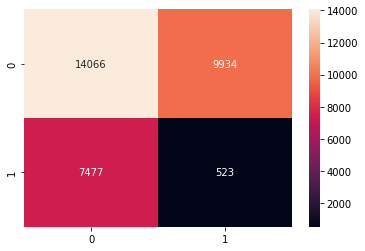

In [31]:
sns.heatmap(metrics.confusion_matrix(y, kmeans_pred), annot=True, fmt = 'g')
plt.show()

In [32]:
print('K-Means Accuracy: ' + str(100 * np.sum(kmeans_pred==y) / y.shape[0]))

K-Means Accuracy: 45.590625


### S7:

Visualization

- Show the average of all airplane images

- Show the average of all images in your first cluster in S6

- Show the average of all images in your second cluster in S6


Q7.1: Based on what you see in these average images, what would you suggest to improve your classifier for differentiating these two classes?

I think it would be a good idea to try feature extraction on the planes - specifically edges, and provide those data to the classifier. Perhaps the more distinct edges would allow the classifier to be more effective at identifying which image contains a plane or does not contain a plane.


In [33]:
def calcMean(df):
    tmp_df = np.array(df.mean()) # calculate mean and return to an np array
    tmp_df = np.rint(tmp_df) # round calculated values to nearest int
    tmp_df = tmp_df.astype(int) # cast calculated values to int for visualization
    return tmp_df

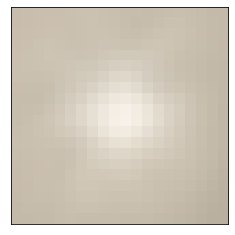

In [34]:
# Q7.1 What is the average airplane image?

df6 = df.loc[df['labels'] == 1]
df6_data = pd.DataFrame(np.vstack(df6.iloc[:,0].values))
df_mean = calcMean(df6_data)

img = df_mean.reshape((3, 400)).T.reshape(20,20,3) # T is for transpose
label = viz['labels'].iloc[i]

# Display img
plt.figure()
plt.xticks([]) # Remove tick marks on x axis
plt.yticks([]) # Remove tick marks on y axis
plt.imshow(img)

plt.show()

In [35]:
df['kmeans_pred'] = kmeans_pred.tolist() # Append KMeans predictions to the main df

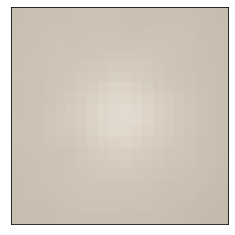

In [36]:
df_KM_NoPlane = df.loc[df['kmeans_pred'] == 0]
df_KM_NoPlane_data = pd.DataFrame(np.vstack(df_KM_NoPlane.iloc[:,0].values))
df_KM_NoPlane_mean = calcMean(df_KM_NoPlane_data)

img = df_KM_NoPlane_mean.reshape((3, 400)).T.reshape(20,20,3) # T is for transpose

# Display img
plt.figure()
plt.xticks([]) # Remove tick marks on x axis
plt.yticks([]) # Remove tick marks on y axis
plt.imshow(img)

plt.show()

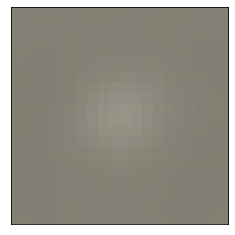

In [37]:
df_KM_Plane = df.loc[df['kmeans_pred'] == 1]
df_KM_Plane_data = pd.DataFrame(np.vstack(df_KM_Plane.iloc[:,0].values))
df_KM_Plane_mean = calcMean(df_KM_Plane_data)

img = df_KM_Plane_mean.reshape((3, 400)).T.reshape(20,20,3) # T is for transpose

# Display img
plt.figure()
plt.xticks([]) # Remove tick marks on x axis
plt.yticks([]) # Remove tick marks on y axis
plt.imshow(img)

plt.show()

### S8 (Bonus):

Extract only 5 features from each image [1]. Train a linear classifier with default parameters on the training data using only these 5 features and apply it on the test data.

[1] Feature extraction should be done without using the class labels

Q8.1: Describe how you extracted your 5 features. How did you choose them?

Q8.2: What is the accuracy of your classifier on the test data: ___



In [55]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc

!jupyter nbconvert --to PDF '/content/drive/MyDrive/Grad School/Penn_MUSA/Spring2022/650_RemoteSensing/Homework/HW2/Clementi_MUSA650_HW2.ipynb'

Reading package lists... Done
Building dependency tree       
Reading state information... Done
pandoc is already the newest version (1.19.2.4~dfsg-1build4).
pandoc set to manually installed.
The following additional packages will be installed:
  fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  javascript-common libcupsfilters1 libcupsimage2 libgs9 libgs9-common
  libijs-0.35 libjbig2dec0 libjs-jquery libkpathsea6 libpotrace0 libptexenc1
  libruby2.5 libsynctex1 libtexlua52 libtexluajit2 libzzip-0-13 lmodern
  poppler-data preview-latex-style rake ruby ruby-did-you-mean ruby-minitest
  ruby-net-telnet ruby-power-assert ruby-test-unit ruby2.5
  rubygems-integration t1utils tex-common tex-gyre texlive-base
  texlive-binaries texlive-fonts-recommended texlive-latex-base
  texlive-latex-recommended texlive-pictures texlive-plain-generic tipa
Suggested packages:
  fonts-noto apache2 | lighttpd | httpd poppler-utils ghostscript
  fonts-japanese-mincho | fonts-ipa